In [1]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as colors
import numpy as np
import pandas as pd

# File to Load (Remember to change these)
city_data_to_load = "data/city_data.csv"
ride_data_to_load = "data/ride_data.csv"

# Read the City and Ride Data
df_city_data = pd.read_csv(city_data_to_load)
df_ride_data = pd.read_csv(ride_data_to_load)

In [2]:
# Combine the data into a single dataset
df_data = pd.merge(df_ride_data,df_city_data, on="city")
# Display the data table for preview
df_data.head()


,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873,5,Urban
1,Lake Jonathanshire,2018-04-07 20:51:11,31.25,4441251834598,5,Urban
2,Lake Jonathanshire,2018-03-09 23:45:55,19.89,2389495660448,5,Urban
3,Lake Jonathanshire,2018-04-07 18:09:21,24.28,7796805191168,5,Urban
4,Lake Jonathanshire,2018-01-02 14:14:50,13.89,424254840012,5,Urban


## Bubble Plot of Ride Sharing Data

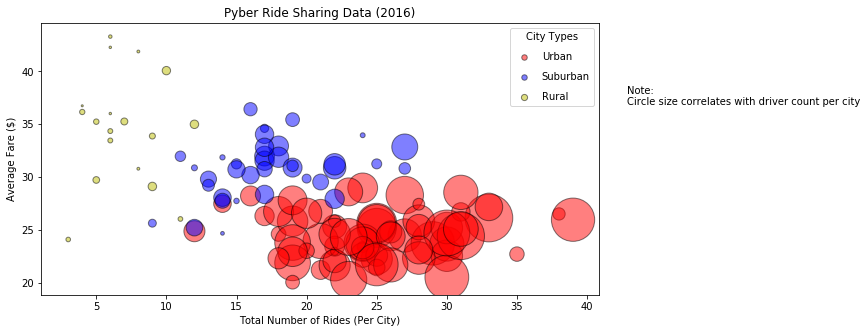

In [3]:
# Obtain the x and y coordinates for each of the three city types
#df_driver_data = df_data.groupby("city").set_index("city")
#df_driver_data.head()                                
##x_axis = df_data.groupby("city")["driver_count"].count()
#y_axis = df_data.groupby("city")["fare"].mean()
#index = df_data.groupby("city").count()
#plt.scatter(x_axis, index, s=x_axis)#, c=['yellow', 'green', 'orange'])

urban_data = df_data[df_data["type"] == "Urban"]
suburban_data = df_data[df_data["type"] == "Suburban"]
rural_data = df_data[df_data["type"] == "Rural"]

urban_ride_count = urban_data.groupby("city")["ride_id"].count()
urban_avg_fare = urban_data.groupby("city")["fare"].mean()
urban_driver_count = urban_data.groupby("city")["driver_count"].sum()
df_urban = pd.DataFrame({"ride_count": urban_ride_count, "avg_fare": urban_avg_fare, "driver_count": urban_driver_count,
                        "type": "Urban" })

suburban_ride_count = suburban_data.groupby("city")["ride_id"].count()
suburban_avg_fare = suburban_data.groupby("city")["fare"].mean()
suburban_driver_count = suburban_data.groupby("city")["driver_count"].sum()
df_suburban = pd.DataFrame({"ride_count": suburban_ride_count, "avg_fare": suburban_avg_fare, "driver_count": suburban_driver_count,
                           "type": "Suburban" })

rural_ride_count = rural_data.groupby("city")["ride_id"].count()
rural_avg_fare = rural_data.groupby("city")["fare"].mean()
rural_driver_count = rural_data.groupby("city")["driver_count"].sum()
df_rural = pd.DataFrame({"ride_count": rural_ride_count, "avg_fare": rural_avg_fare, "driver_count": rural_driver_count,
                        "type": "Rural" })

# Build the scatter plots for each city types

urban_ax = df_urban.plot(figsize=(10,5), kind="scatter", x="ride_count", y="avg_fare", s=df_urban["driver_count"], alpha=0.5, color="r", label='Urban', edgecolors='black')
suburban_ax = df_suburban.plot(kind="scatter", x="ride_count", y="avg_fare", s=df_suburban["driver_count"], alpha=0.5, color='b', label='Suburban', ax=urban_ax, edgecolors='black')
rural_ax = df_rural.plot(kind="scatter", x="ride_count", y="avg_fare", s=df_rural["driver_count"], alpha=0.5, color='y', label='Rural', ax=urban_ax, edgecolors='black')

# Incorporate the other graph properties
urban_ax.set_xlabel("Total Number of Rides (Per City)")
urban_ax.set_ylabel("Average Fare ($)")
plt.title("Pyber Ride Sharing Data (2016)")

# Create a legend
legend = plt.legend(labelspacing=1, title="City Types", numpoints=1, fontsize=10)
legend.legendHandles[0]._sizes = [30]
legend.legendHandles[1]._sizes = [30]

# Incorporate a text label regarding circle size
urban_ax.text(1.05, .75, "Note:",
        size=10, ha='left', va='center', transform=urban_ax.transAxes)
urban_ax.text(1.05, .71, "Circle size correlates with driver count per city",
              size=10, ha='left', va='center', transform=urban_ax.transAxes)
# Save Figure
figure = urban_ax.get_figure()
figure.savefig('pyber_data.png')

In [4]:
# Show plot
plt.show()

## Total Fares by City Type

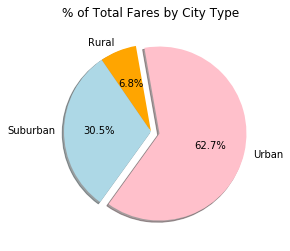

In [5]:
# Calculate Type Percents
df_fares = pd.DataFrame(df_data.groupby("type")["fare"].sum())
df_fares = df_fares.rename(columns={"fare": "avg_fare"})

total_fares = df_fares.sum()
percentage_function = lambda x: (int(x) / total_fares) * 100

df_fares = df_fares["avg_fare"].apply(percentage_function)
df_fares.head()
# Build Pie Chart

# Labels for the sections of our pie chart
labels = ["Rural", "Suburban", "Urban"]

# The values of each section of the pie chart
pie_data = df_fares["avg_fare"]

# The colors of each section of the pie chart
colors = ["orange", "lightblue", "pink"]

# Tells matplotlib to seperate the "Python" section from the others
explode = (0, 0, 0.1)

pie_fares_by_city_type = df_fares.plot.pie(y="avg_fare", explode=explode, labels=labels, colors=colors,
                            autopct="%1.1f%%", shadow=True, startangle=100, title="% of Total Fares by City Type",
                            legend=False)

pie_fares_by_city_type = pie_fares_by_city_type.axes.set_ylabel('')

# Save Figure
figure = pie_fares_by_city_type.get_figure()
figure.savefig('pie_fares_by_city_type.png')

In [6]:
# Show Figure
plt.show()

## Total Rides by City Type

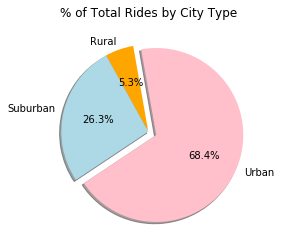

In [7]:
# Calculate Ride Percents
df_rides = pd.DataFrame(df_data.groupby("type")["ride_id"].count())
total_rides = df_rides.sum()
percentage_function = lambda x: (int(x) / total_rides) * 100
df_rides = df_rides["ride_id"].apply(percentage_function)
# Build Pie Chart
pie_rides_by_city_type = df_rides.plot.pie(y="ride_id", explode=explode, labels=labels, colors=colors,
                            autopct="%1.1f%%", shadow=True, startangle=100, title="% of Total Rides by City Type",
                            legend=False)
pie_rides_by_city_type = pie_rides_by_city_type.axes.set_ylabel('')


# Save Figure
figure = pie_rides_by_city_type.get_figure()
figure.savefig('pie_rides_by_city_type.png')

In [8]:
# Show Figure
plt.show()

## Total Drivers by City Type

HELLO - I CAME UP WITH DIFFERENT PERCENTAGES FOR THIS ONE.  NOT SURE WHY?
          driver_count
type                  
Rural         0.781557
Suburban     12.472893
Urban        86.745550


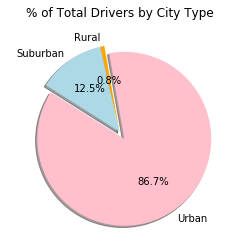

In [11]:
# Calculate Driver Percents
df_drivers = pd.DataFrame(df_data.groupby("type")["driver_count"].sum())
total_drivers = df_drivers.sum()

percentage_function = lambda x: (int(x) / total_drivers) * 100
df_drivers = df_drivers["driver_count"].apply(percentage_function)

print("HELLO - I CAME UP WITH DIFFERENT PERCENTAGES FOR THIS ONE.  NOT SURE WHY?")
print(df_drivers.head())

# Build Pie Charts

pie_drivers_by_city_type = df_drivers.plot.pie(y="driver_count", explode=explode, labels=labels, colors=colors,
                            autopct="%1.1f%%", shadow=True, startangle=100, title="% of Total Drivers by City Type",
                            legend=False)
pie_drivers_by_city_type = pie_drivers_by_city_type.axes.set_ylabel('')

# Save Figure

figure = pie_drivers_by_city_type.get_figure()
figure.savefig('pie_drivers_by_city_type.png')

In [10]:
# Show Figure
plt.show()